In [5]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)
print("Arquivos disponíveis:", os.listdir(path))

Using Colab cache for faster access to the 'salary-dataset-simple-linear-regression' dataset.
Path to dataset files: /kaggle/input/salary-dataset-simple-linear-regression
Arquivos disponíveis: ['Salary_dataset.csv']


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv(f"{path}/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [17]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [18]:
df['Salary'].describe()

,Salary
count,30.000000
mean,76004.000000
std,27414.429785
min,37732.000000
25%,56721.750000
50%,65238.000000
75%,100545.750000
max,122392.000000


<Axes: >

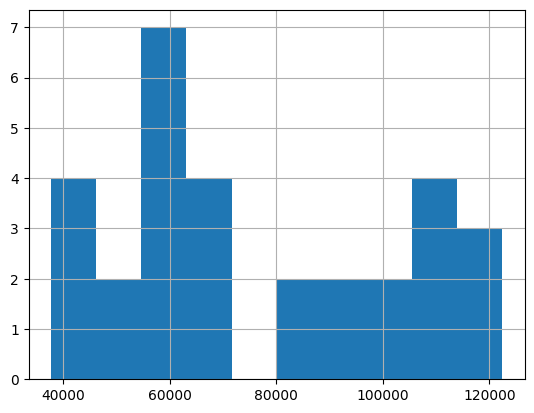

In [12]:
df['Salary'].hist()

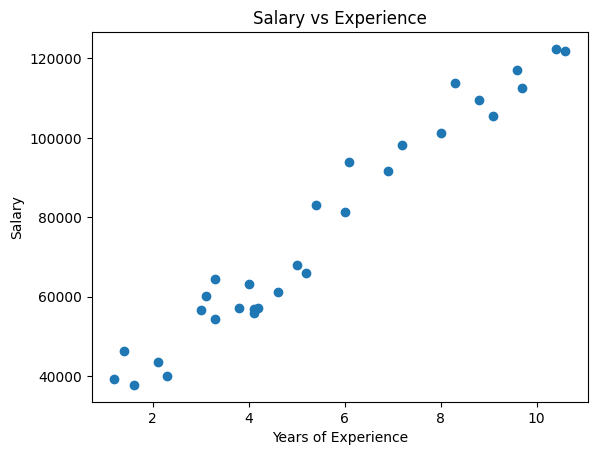

In [29]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
X = df[['YearsExperience']] #feature
y = df['Salary']  #target

In [22]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [23]:
y_pred = model.predict(X)
residuals = y - y_pred

In [24]:
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("\n--- Regressão Linear ---")
print(f"R² médio: {np.mean(r2):.4f} | Desvio padrão: {np.std(r2):.4f}")
print(f"RMSE médio: {np.mean(rmse):.4f} | Desvio padrão: {np.std(rmse):.4f}")


--- Regressão Linear ---
R² médio: 0.9570 | Desvio padrão: 0.0000
RMSE médio: 5592.0436 | Desvio padrão: 0.0000


In [25]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
sm_model = sm.OLS(y, X_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.14e-20
Time:                        19:02:22   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     

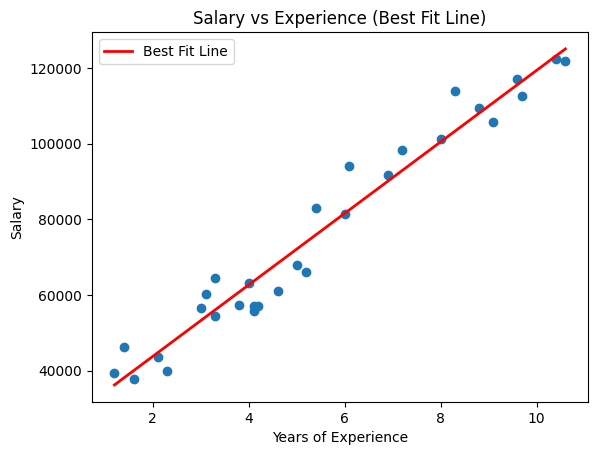

In [26]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.plot(X,model.predict(X),color='red',linewidth=2, label='Best Fit Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Best Fit Line)')
plt.legend()
plt.show()